In [1]:
import os
import IPython.display as ipd
import matplotlib.pyplot as plt

import numpy as np
import librosa, librosa.display
from scipy.fft import rfft

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder


import seaborn as sns

import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
#Running tensorflow on GPU
len(tf.config.list_physical_devices('GPU'))

1

In [ ]:
#anger 0
#disgust 1
#fear 2
#happy 3
#sad 4
#neutral 5

In [5]:
ravdess_file = []
ravdess_label = []

ravdess_dict = {5:0, 7:1, 6:2, 3:3, 4:4, 1:5}

for i in range(0, 24):
    # Get all file names in the dir
    actor = "Actor_%02d" % (i + 1)
    inputs = os.listdir('./data/RAV/' + actor)
    
    for ele in inputs:
        file_name = ele.split('-')


        if int(file_name[2]) in [5,7,6,3,4,1]:
            ravdess_file.append('./data/RAV/' + actor + '/' + ele) # Form paths to the files
            ravdess_label.append(ravdess_dict[int(file_name[2])])                    # Get emotion label
 
ravdess = list(zip(ravdess_file,ravdess_label))
ravdess_df = pd.DataFrame(ravdess, columns=['file', 'label'])

ravdess_df.head()

,file,label
0,./data/RAV/Actor_01/03-01-01-01-01-01-01.wav,5
1,./data/RAV/Actor_01/03-01-01-01-01-02-01.wav,5
2,./data/RAV/Actor_01/03-01-01-01-02-01-01.wav,5
3,./data/RAV/Actor_01/03-01-01-01-02-02-01.wav,5
4,./data/RAV/Actor_01/03-01-03-01-01-01-01.wav,3


In [6]:
emodb_file = []
emodb_label = []

emodb_dict = {'W':0, 'E':1, 'A':2, 'F':3, 'T':4, 'N':5}

inputs = os.listdir('./data/EmoDB/wav/')

for ele in inputs:
    if ele[5] in ['W', 'E', 'A', 'F', 'T', 'N']:
        emodb_file.append('./data/EmoDB/wav/' + ele)
    
        emodb_label.append(emodb_dict[ele[5]])
    
emodb = list(zip(emodb_file,emodb_label))

emodb_df = pd.DataFrame(emodb, columns=['file', 'label'])

emodb_df.head()

,file,label
0,./data/EmoDB/wav/03a01Fa.wav,3
1,./data/EmoDB/wav/03a01Nc.wav,5
2,./data/EmoDB/wav/03a01Wa.wav,0
3,./data/EmoDB/wav/03a02Fc.wav,3
4,./data/EmoDB/wav/03a02Nc.wav,5


In [7]:
tess_file = []
tess_label = []

tess_dict = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'neutral':5}

temp = os.listdir('./data/TESS')
inputs = []

for ele in temp:
    if '.wav' in ele:
        inputs.append(ele)
        
for ele in inputs:
    file_name = ele.replace('.', '_')
    file_name = file_name.split('_')   
    if file_name[2] in ['angry', 'disgust', 'fear', 'happy', 'sad', 'neutral']:
        tess_file.append('./data/TESS/' + ele)
        tess_label.append(tess_dict[file_name[2]])

tess = list(zip(tess_file,tess_label))

tess_df = pd.DataFrame(tess, columns=['file', 'label'])

tess_df.head()

,file,label
0,./data/TESS/OAF_back_angry.wav,0
1,./data/TESS/OAF_back_disgust.wav,1
2,./data/TESS/OAF_back_fear.wav,2
3,./data/TESS/OAF_back_happy.wav,3
4,./data/TESS/OAF_back_neutral.wav,5


In [8]:
savee_file = []
savee_label = []

savee_dict = {'a':0, 'd':1, 'f':2, 'h':3, 'sa':4, 'n':5}

actors = ['DC', 'JE', 'JK', 'KL']

for actor in actors:
    inputs = os.listdir('./data/SAVEE/' + actor)
    
    for ele in inputs:
        if(ele.split('.')[0][:-2] in ['a', 'd', 'f', 'h', 'sa', 'n']):
            savee_file.append('./data/SAVEE/' + actor + '/' + ele)
            savee_label.append(savee_dict[ele.split('.')[0][:-2]])
        
savee = list(zip(savee_file,savee_label))

savee_df = pd.DataFrame(savee, columns=['file', 'label'])


In [9]:

main = pd.concat([ravdess_df, savee_df, emodb_df, tess_df])

In [10]:
main.head()

,file,label
0,./data/RAV/Actor_01/03-01-01-01-01-01-01.wav,5
1,./data/RAV/Actor_01/03-01-01-01-01-02-01.wav,5
2,./data/RAV/Actor_01/03-01-01-01-02-01-01.wav,5
3,./data/RAV/Actor_01/03-01-01-01-02-02-01.wav,5
4,./data/RAV/Actor_01/03-01-03-01-01-01-01.wav,3


In [11]:
main.shape

(4330, 2)

In [17]:
#Shuffle dataset
main = main.sample(frac=1).reset_index(drop=True)

In [18]:
main

,file,label
0,./data/TESS/OAF_third_neutral.wav,5
1,./data/EmoDB/wav/09a02Wb.wav,0
2,./data/RAV/Actor_18/03-01-06-02-02-02-18.wav,2
3,./data/TESS/YAF_seize_neutral.wav,5
4,./data/EmoDB/wav/14b02Na.wav,5
...,...,...
4325,./data/TESS/OAF_raise_disgust.wav,1
4326,./data/TESS/YAF_white_neutral.wav,5
4327,./data/TESS/OAF_wheat_disgust.wav,1
4328,./data/TESS/OAF_vote_fear.wav,2


In [163]:
file = list(main['file'])
label = np.array(main['label'])
label = np.reshape(label, (-1,1))

In [172]:
enc = OneHotEncoder()
label_onehot = enc.fit_transform(label).toarray()
label_onehot

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [168]:
one_hot_label = []
for l in label:
    one_hot_label.append(label_onehot[l])

In [169]:
label

array([[5],
       [0],
       [2],
       ...,
       [1],
       [2],
       [2]], dtype=int64)

In [171]:
for i in one_hot_label:
    print(i.reshape(1,-1))

[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0.

[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0.

[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0.

In [22]:
label[:10]

[5, 0, 2, 5, 5, 0, 2, 1, 2, 0]

In [23]:
# Runs for a LOOONGGGGGGG Time
lbr_data = []

for ele in file:
    temp, sfreq = librosa.load(ele)
    lbr_data.append(np.pad(temp, (0, 197971 - len(temp))))

In [28]:
lbr_data

[array([-1.8481709e-06, -6.4664331e-05, -5.4802487e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 array([2.6984993e-05, 7.2911964e-05, 1.3336104e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([1.9963752e-04, 2.8329983e-04, 6.5009612e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([-2.8046450e-06, -2.0734490e-04, -2.0283973e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 array([5.2558217e-04, 3.4244818e-04, 8.6794229e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([ 5.3298578e-04,  2.5160046e-04, -5.1581301e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([-8.963031e-06, -5.589061e-05, -2.079222e-04, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00], dtype=float32),
 array([ 6.633161e-06, -5.119078

In [214]:
mfcc_data = []
for ele in lbr_data:
    mfcc_data.append(librosa.feature.mfcc(ele))

In [215]:
mfcc_data = np.array(mfcc_data)

In [216]:
mfcc_data.shape

(4330, 20, 387)

In [217]:
mfcc_data = np.array(mfcc_data).reshape(4330, 20, 387,1)

In [3]:
#Save dataset
import pickle

In [ ]:
pickle_out = open("mfcc_data.pickle","wb")
pickle.dump(mfcc_data, pickle_out)
pickle_out.close()

pickle_out1 = open("label_onehot.pickle", "wb")
pickle.dump(label_onehot, pickle_out1)
pickle_out.close()

In [4]:
pickle_in = open("mfcc_data.pickle", "rb")
mfcc_data = pickle.load(pickle_in)

In [226]:
pickle_in = open("label_onehot.pickle", "rb")
label_onehot = pickle.load(pickle_in)

In [5]:
pickle_in = open("label_onehot.pickle", "rb")
label_onehot = pickle.load(pickle_in)

In [6]:
label_onehot

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [7]:
train_X, test_X, train_y, test_y = train_test_split(mfcc_data,label_onehot, test_size=0.15, shuffle=True)

In [8]:
print(train_X.shape)
print(train_y.shape)

(3680, 20, 387, 1)
(3680, 6)


In [9]:
#MODEL BASED ON PAPER

#LOCAL FEATURE LEARNING BLOCK
model_paper = keras.Sequential()
model_paper.add(keras.Input(shape=(20,387,1)))

model_paper.add(layers.Conv2D(64,(3,3), activation="relu",padding="same",strides = (1,1)))
#model_cnn1.add(layers.Conv1D(num_filter,kernel_size, activation="relu",padding="same"))
model_paper.add(layers.BatchNormalization())
model_paper.add(layers.Activation(activations.elu))
model_paper.add(layers.MaxPooling2D(pool_size = (2,2), strides = (2,2),padding="same"))

model_paper.add(layers.Conv2D(64,(3,3), activation="relu",padding="same",strides = (1,1)))
#model_cnn1.add(layers.Conv1D(num_filter,kernel_size, activation="relu",padding="same"))
model_paper.add(layers.BatchNormalization())
model_paper.add(layers.Activation(activations.elu))
model_paper.add(layers.MaxPooling2D(pool_size = (4,4), strides = (4,4),padding="same"))

model_paper.add(layers.Conv2D(128,(3,3), activation="relu",padding="same",strides = (1,1)))
#model_cnn1.add(layers.Conv1D(num_filter,kernel_size, activation="relu",padding="same"))
model_paper.add(layers.BatchNormalization())
model_paper.add(layers.Activation(activations.elu))
model_paper.add(layers.MaxPooling2D(pool_size = (4,4), strides = (4,4),padding="same"))

model_paper.add(layers.Conv2D(128,(3,3), activation="relu",padding="same",strides = (1,1)))
#model_cnn1.add(layers.Conv1D(num_filter,kernel_size, activation="relu",padding="same"))
model_paper.add(layers.BatchNormalization())
model_paper.add(layers.Activation(activations.elu))
model_paper.add(layers.MaxPooling2D(pool_size = (4,4), strides = (4,4),padding="same"))

model_paper.add(layers.Reshape((16, 32)))


model_paper.add(layers.LSTM(256,return_sequences=True))

model_paper.add(layers.Flatten())
"""
model_paper.add(layers.Dense(100, activation="relu"))
model_paper.add(layers.BatchNormalization())
model_paper.add(layers.Dense(50, activation="relu"))
model_paper.add(layers.BatchNormalization())
model_paper.add(layers.Dense(7, activation="relu"))
"""
model_paper.add(layers.Dense(6, activation="softmax"))

model_paper.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 387, 64)       640       
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 387, 64)       256       
_________________________________________________________________
activation (Activation)      (None, 20, 387, 64)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 194, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 194, 64)       36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 194, 64)       256       
_________________________________________________________________
activation_1 (Activation)    (None, 10, 194, 64)       0

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=8, restore_best_weights=True)

In [15]:
model_paper.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_paper = model_paper.fit(train_X, train_y, batch_size=16
                          , epochs=100, validation_split=0.1)

Train on 3312 samples, validate on 368 samples
Epoch 1/100
3312/3312 [==============================] - 3s 1ms/sample - loss: 0.0557 - accuracy: 0.9813 - val_loss: 0.8156 - val_accuracy: 0.8261
Epoch 2/100
3312/3312 [==============================] - 2s 536us/sample - loss: 0.0563 - accuracy: 0.9840 - val_loss: 0.7821 - val_accuracy: 0.8397
Epoch 3/100
3312/3312 [==============================] - 2s 533us/sample - loss: 0.0543 - accuracy: 0.9774 - val_loss: 0.8981 - val_accuracy: 0.8234
Epoch 4/100
3312/3312 [==============================] - 2s 534us/sample - loss: 0.0300 - accuracy: 0.9879 - val_loss: 0.8624 - val_accuracy: 0.8478
Epoch 5/100
3312/3312 [==============================] - 2s 536us/sample - loss: 0.0308 - accuracy: 0.9918 - val_loss: 0.7060 - val_accuracy: 0.8533
Epoch 6/100
3312/3312 [==============================] - 2s 539us/sample - loss: 0.0528 - accuracy: 0.9816 - val_loss: 0.7003 - val_accuracy: 0.8424
Epoch 7/100
3312/3312 [==============================] - 2s 5

3312/3312 [==============================] - 2s 534us/sample - loss: 0.0096 - accuracy: 0.9958 - val_loss: 0.7324 - val_accuracy: 0.8696
Epoch 56/100
3312/3312 [==============================] - 2s 533us/sample - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.6529 - val_accuracy: 0.8832
Epoch 57/100
3312/3312 [==============================] - 2s 535us/sample - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.7393 - val_accuracy: 0.8668
Epoch 58/100
3312/3312 [==============================] - 2s 536us/sample - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.6321 - val_accuracy: 0.8668
Epoch 59/100
3312/3312 [==============================] - 2s 535us/sample - loss: 0.0440 - accuracy: 0.9837 - val_loss: 0.5937 - val_accuracy: 0.8913
Epoch 60/100
3312/3312 [==============================] - 2s 535us/sample - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.5951 - val_accuracy: 0.8804
Epoch 61/100
3312/3312 [==============================] - 2s 537us/sample - loss: 0.0153 - accuracy: 0.9937 - val

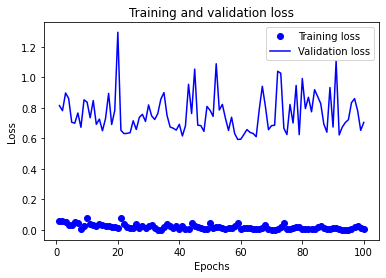

In [16]:
loss = hist_paper.history['loss']
val_loss = hist_paper.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

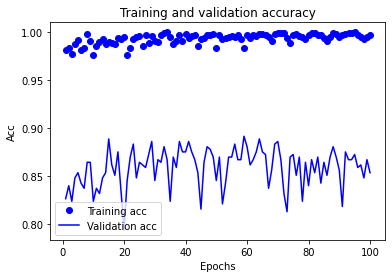

In [17]:
plt.clf()
acc = hist_paper.history['accuracy']
val_acc = hist_paper.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [18]:
model_paper.save("Article_Model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Article_Model\assets


In [20]:
# evaluate model on private test set
score = model_paper.evaluate(test_X, test_y, verbose=0)
print ("model %s: %.2f%%" % (model_paper.metrics_names[1], score[1]*100))

model accuracy: 85.85%
